In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# load the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/co2_emissions_data.csv")

In [ ]:
# Analysis
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
Emission Class                      0
dtype: int64


In [ ]:
# Check if numeric features are on the same scale
numeric_features = df.select_dtypes(include=[np.number]).columns.drop("CO2 Emissions(g/km)")
print("Summary statistics for numeric features:\n")
print(df[numeric_features].describe())

# Numeric features in the dataset as Engine Size(L) and Fuel Consumption Comb (L/100 km) have different ranges and standard deviations.
# Engine Size(L) ranges from 0.9 to 8.4, while Fuel Consumption Comb (L/100 km) ranges from 4.1 to 26.1.
# This shows that the features are not on the same scale, which can impact the performance of regression models.
# Standardization is needed to scale them to have a mean of 0 and a standard deviation of 1 ensuring all features contribute equally.

Summary statistics for numeric features:

       Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         3.160068     5.615030                         12.556534   
std          1.354170     1.828307                          3.500274   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.600000   
max          8.400000    16.000000                         30.600000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      7385.000000                       7385.000000   
mean                          9.041706                         10.975071   
std                           2.224456                          2.892506   
min  

In [ ]:
# Encoding Categorical variables
lst = ['Make','Model','Vehicle Class','Transmission','Fuel Type', 'Emission Class']
for i in lst :
  le = LabelEncoder()
  df[i] = le.fit_transform(df[i])

df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Emission Class
0,0,1057,0,2.0,4,14,4,9.9,6.7,8.5,33,196,2
1,0,1057,0,2.4,4,25,4,11.2,7.7,9.6,29,221,0
2,0,1058,0,1.5,4,22,4,6.0,5.8,5.9,48,136,2
3,0,1233,11,3.5,6,15,4,12.7,9.1,11.1,25,255,0
4,0,1499,11,3.5,6,15,4,12.1,8.7,10.6,27,244,0


In [ ]:
# Scale the numeric features
# Apply StandardScaler
to_scale = df.columns.difference(['CO2 Emissions(g/km)', 'Emission Class'])
ss = StandardScaler()
df[to_scale] = ss.fit_transform(df[to_scale])
print(df.head())

       Make     Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0 -1.730214  0.057785      -1.319720       -0.856721  -0.883408     -0.003824   
1 -1.730214  0.057785      -1.319720       -0.561317  -0.883408      1.511325   
2 -1.730214  0.059519      -1.319720       -1.225976  -0.883408      1.098102   
3 -1.730214  0.362820       0.961192        0.251043   0.210575      0.133917   
4 -1.730214  0.823839       0.961192        0.251043   0.210575      0.133917   

   Fuel Type  Fuel Consumption City (L/100 km)  \
0   0.836161                         -0.759002   
1   0.836161                         -0.387577   
2   0.836161                         -1.873275   
3   0.836161                          0.040990   
4   0.836161                         -0.130437   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                        -1.052781                         -0.855742   
1                        -0.603202                         -0.475423

In [ ]:
# Visualize pairplot with histograms on diagonal
sns.pairplot(data=df, diag_kind='hist')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

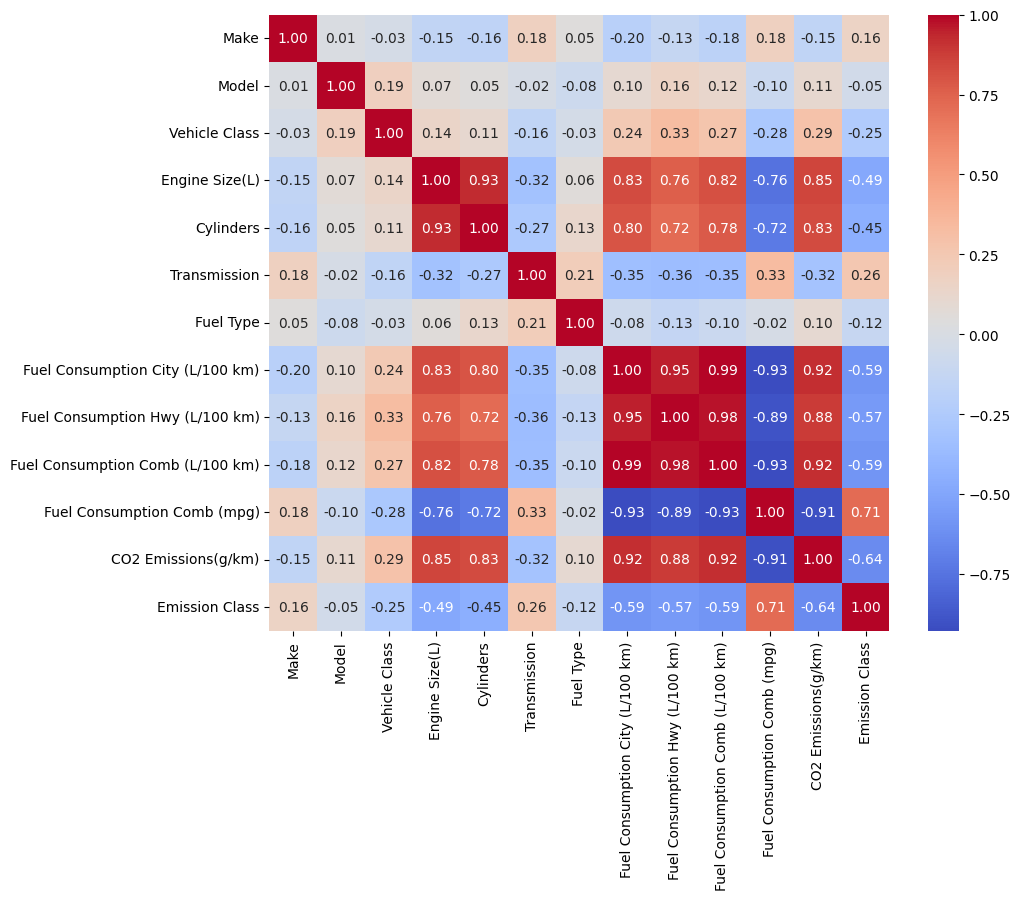

In [ ]:
# Visualize correlation heatmap
correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [ ]:
# Separate data to features and targets
x_data = df.drop(columns=['CO2 Emissions(g/km)', 'Emission Class'])
y_data = df.drop(df.columns[:11], axis=1)

In [ ]:
x_train ,x_test ,y_train, y_test = train_test_split(x_data,y_data,test_size=0.20,random_state=42)

(((5908, 11), (5908, 2)), ((1477, 11), (1477, 2)))